In [ ]:
%matplotlib inline
import time
from IPython import display
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
#             print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return(loss_fn(pred, y).item())
    

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
#     print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss, 100*correct

In [ ]:
# download and preprocess data, create dataloaders
resize = (32, 32)
batch_size = 128
trans = transforms.Compose([transforms.Resize(resize),
                            transforms.ToTensor()])

train_dataset = torchvision.datasets.FashionMNIST(root = '../data',
                                                  train = True,
                                                  transform = trans,
                                                  download = True)

test_dataset = torchvision.datasets.FashionMNIST(root = '../data',
                                                  train = False,
                                                  transform = trans,
                                                  download = True)

train_dataloader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_dataloader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [ ]:
# define model
class SimpleNetwork(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens):
        super().__init__()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.Linear(num_inputs, num_hiddens),
                                 nn.ReLU(),
                                 nn.Linear(num_hiddens, num_outputs))
        
    def forward(self, X):
        return self.net(X)

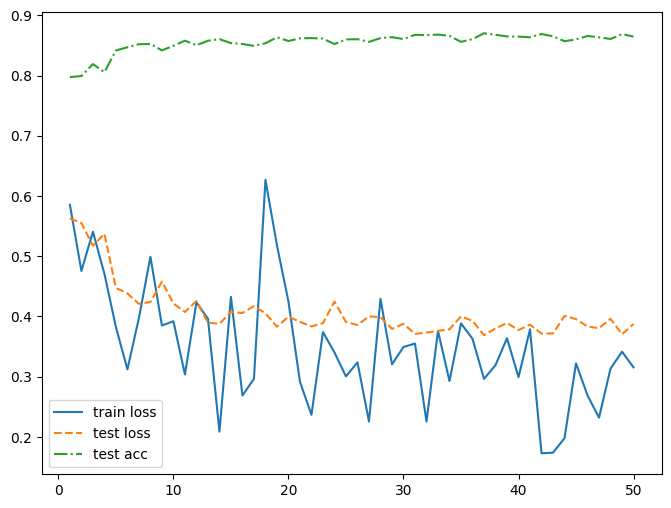

Final Accuracy: 86.5%


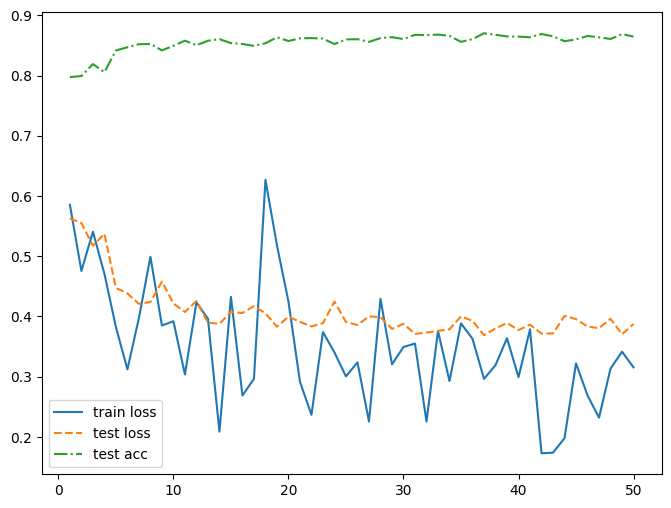

In [ ]:
# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_inputs = 1024
num_outputs = 10
num_hiddens = 20
model = SimpleNetwork(num_inputs, num_outputs, num_hiddens).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

epochs = 50

plt.figure(figsize=(8,6))
train_losses = []
test_losses = []
test_accs = []
for t in range(epochs):
    train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loss, test_acc = test_loop(test_dataloader, model, loss_fn)
    
    # plot
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(test_acc/100)
    plt.clf()
    plt.plot(np.arange(1, t+2), train_losses, '-', label='train loss')
    plt.plot(np.arange(1, t+2), test_losses, '--', label='test loss')
    plt.plot(np.arange(1, t+2), test_accs, '-.', label='test acc')
    plt.legend()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.0001)
    
print(f"Final Accuracy: {(test_acc):>0.1f}%")

In [ ]:
class LeNet(nn.Module):
    """The LeNet-5 model."""
    def __init__(self, num_outputs=10):
        super().__init__()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_outputs))
        
    def forward(self, X):
        return self.net(X)

def init_weights(module):
    """Initialize weights for CNNs."""
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

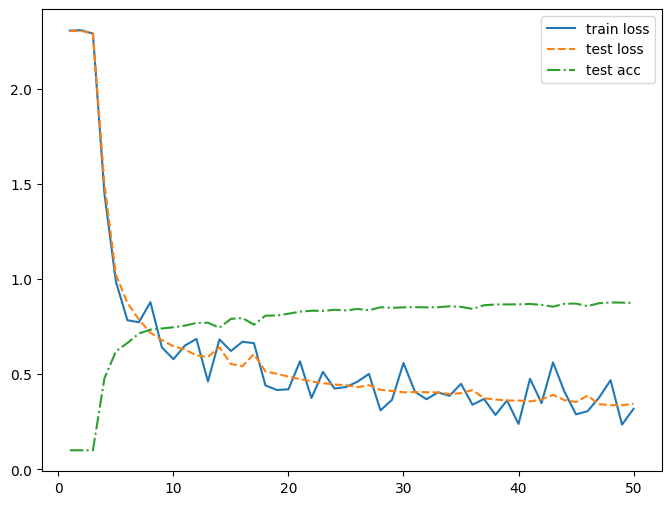

Final Accuracy: 87.6%


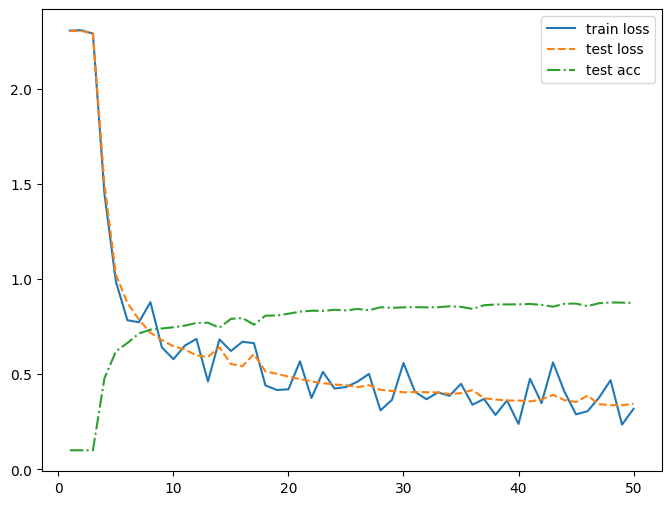

In [ ]:
num_outputs = 10
model = LeNet(num_outputs).to(device)
# initialize weights, requires forward pass for Lazy layers
X = next(iter(train_dataloader))[0].to(device)    # get a batch from dataloader
model.forward(X)                       # apply forward pass
model.apply(init_weights)              # apply initialization

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

epochs = 50

plt.figure(figsize=(8,6))
train_losses = []
test_losses = []
test_accs = []
for t in range(epochs):
    train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loss, test_acc = test_loop(test_dataloader, model, loss_fn)
    
    # plot
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(test_acc/100)
    plt.clf()
    plt.plot(np.arange(1, t+2), train_losses, '-', label='train loss')
    plt.plot(np.arange(1, t+2), test_losses, '--', label='test loss')
    plt.plot(np.arange(1, t+2), test_accs, '-.', label='test acc')
    plt.legend()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.0001)
    
print(f"Final Accuracy: {(test_acc):>0.1f}%")